In [45]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics, model_selection, datasets

In [46]:
# Collecting the data

data = datasets.load_digits()
print(dir(data))

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df['target_names'] = df['target'].apply(lambda x : data.target_names[x])
df.head()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


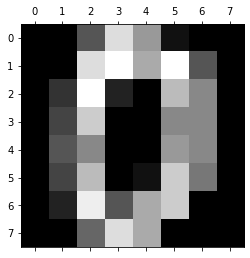

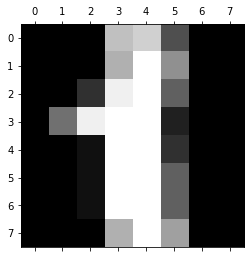

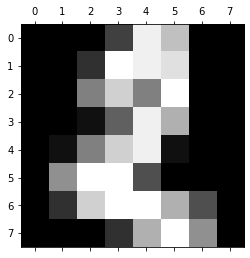

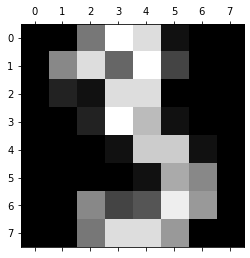

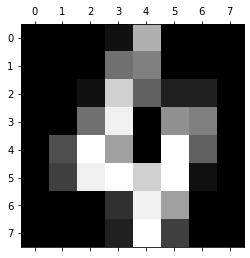

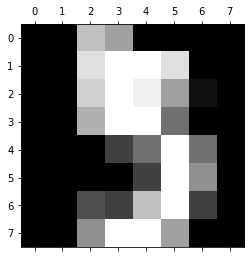

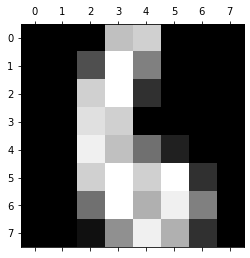

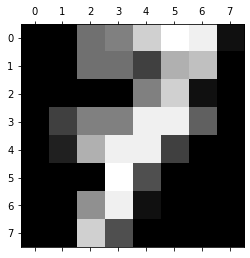

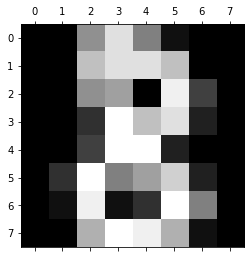

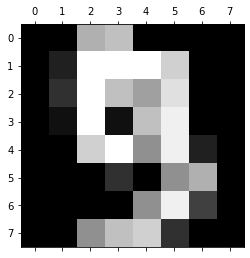

In [47]:
# Visualizing the data

for x in data.images[:10]:
    plt.matshow(x)
    plt.gray()
    plt.show()


In [48]:
# Splitting the data into testing and training data

X = df.drop(['target', 'target_names'], axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [55]:
# Training the model

model = svm.SVC(kernel = "rbf", gamma = 10)

model.fit(X_test, y_test)

SVC(gamma=10)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5]


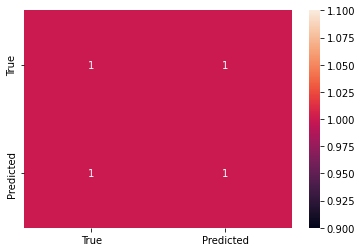

In [56]:
# Testing the model and predicting the result

y_predicted = model.predict(X_test)
print(y_predicted)

y_true_df = pd.DataFrame(y_test, columns = ['True'])
y_pred_df = pd.DataFrame(y_predicted, columns = ['Predicted'])

new_df = pd.concat([y_true_df, y_pred_df], axis = 1)

sns.heatmap(new_df.corr(), annot = True)
plt.show()

In [57]:
# Checking the accuracy of the model

print("Accuracy :", model.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predicted))

Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        34

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

